In [ ]:
!pip install qiskit
!pip install pylatexenc
!pip install qiskit-aer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 27.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 18.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 3.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=1420b751be3f68dbf99e30a47dfa54d37e84bc24a6a3b48c77474477fa47c4e0
  Stored in directory: /root/.cache/pip/wheels/d3/31/8b/e09b0386afd80cfc556c00408c9aeea5c35c4d484a9c762fd5
Successfully built pylatexenc
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 83.0 MB/s eta 0:00:00


# <font color=#786531>E91 Key Generation</font>

In [ ]:
from qiskit import *
from qiskit_aer import Aer
from qiskit.providers.basic_provider import BasicProvider
import math

In [ ]:
# useful additional packages
import numpy as np
import random
# regular expressions module
import re

# importing the QISKit
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister

# import basic plot tools
#from qiskit.tools.visualization import circuit_drawer, plot_histogram

In [ ]:
# Creating registers
qr = QuantumRegister(2, name="qr")
cr = ClassicalRegister(4, name="cr")

In [ ]:
singlet = QuantumCircuit(qr, cr, name='singlet')
singlet.h(qr[0])
singlet.cx(qr[0],qr[1])

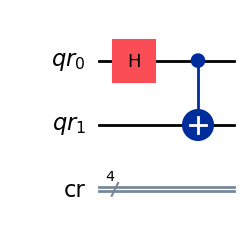

In [ ]:
singlet.draw(output = 'mpl')

In [ ]:
## Alice's measurement circuits

# measure the spin projection of Alice's qubit onto the a_1 direction (X basis)
measureA1 = QuantumCircuit(qr, cr, name='measureA1')
measureA1.h(qr[0])
measureA1.measure(qr[0],cr[0])

# measure the spin projection of Alice's qubit onto the a_2 direction (W basis)
measureA2 = QuantumCircuit(qr, cr, name='measureA2')
measureA2.s(qr[0])
measureA2.h(qr[0])
measureA2.t(qr[0])
measureA2.h(qr[0])
measureA2.measure(qr[0],cr[0])

# measure the spin projection of Alice's qubit onto the a_3 direction (standard Z basis)
measureA3 = QuantumCircuit(qr, cr, name='measureA3')
measureA3.measure(qr[0],cr[0])

## Bob's measurement circuits

# measure the spin projection of Bob's qubit onto the b_1 direction (W basis)
measureB1 = QuantumCircuit(qr, cr, name='measureB1')
measureB1.s(qr[1])
measureB1.h(qr[1])
measureB1.t(qr[1])
measureB1.h(qr[1])
measureB1.measure(qr[1],cr[1])

# measure the spin projection of Bob's qubit onto the b_2 direction (standard Z basis)
measureB2 = QuantumCircuit(qr, cr, name='measureB2')
measureB2.measure(qr[1],cr[1])

# measure the spin projection of Bob's qubit onto the b_3 direction (V basis)
measureB3 = QuantumCircuit(qr, cr, name='measureB3')
measureB3.s(qr[1])
measureB3.h(qr[1])
measureB3.tdg(qr[1])
measureB3.h(qr[1])
measureB3.measure(qr[1],cr[1])

## Lists of measurement circuits
aliceMeasurements = [measureA1, measureA2, measureA3]
bobMeasurements = [measureB1, measureB2, measureB3]

In [ ]:
numberOfSinglets = 500

In [ ]:
aliceMeasurementChoices = [random.randint(1, 3) for i in range(numberOfSinglets)] # string b of Alice
bobMeasurementChoices = [random.randint(1, 3) for i in range(numberOfSinglets)] # string b' of Bob

In [ ]:
print(aliceMeasurementChoices)

[1, 1, 1, 1, 2, 1, 2, 2, 3, 3, 3, 2, 2, 1, 1, 3, 2, 2, 3, 1, 3, 3, 2, 2, 2, 3, 2, 2, 3, 3, 2, 2, 1, 1, 2, 3, 2, 2, 2, 3, 3, 3, 2, 2, 2, 2, 2, 3, 3, 1, 1, 3, 3, 1, 1, 3, 1, 3, 3, 1, 1, 1, 2, 3, 3, 1, 1, 3, 3, 1, 1, 1, 1, 3, 2, 3, 3, 1, 2, 3, 1, 2, 2, 1, 1, 2, 2, 1, 2, 2, 3, 2, 2, 3, 1, 1, 3, 2, 1, 3, 2, 3, 2, 2, 2, 2, 3, 1, 1, 1, 3, 3, 2, 2, 1, 2, 1, 1, 2, 2, 1, 2, 1, 3, 2, 3, 1, 1, 3, 2, 1, 1, 1, 3, 2, 3, 3, 3, 3, 3, 2, 2, 1, 1, 1, 2, 2, 3, 1, 1, 2, 1, 3, 2, 3, 3, 1, 3, 3, 1, 2, 2, 3, 2, 3, 2, 3, 1, 3, 2, 2, 3, 2, 3, 1, 3, 2, 3, 1, 1, 2, 1, 1, 3, 3, 2, 1, 3, 3, 1, 1, 2, 2, 1, 2, 1, 2, 3, 3, 2, 1, 3, 1, 2, 1, 3, 2, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 3, 2, 3, 1, 1, 2, 2, 3, 2, 2, 3, 1, 1, 2, 3, 1, 3, 3, 3, 1, 3, 1, 1, 3, 3, 1, 2, 1, 2, 3, 1, 2, 2, 3, 3, 2, 3, 2, 3, 3, 1, 1, 2, 2, 1, 2, 1, 3, 1, 3, 2, 1, 3, 2, 1, 1, 3, 3, 1, 3, 3, 2, 2, 3, 3, 2, 3, 2, 1, 3, 3, 2, 2, 2, 2, 2, 3, 3, 3, 3, 2, 2, 2, 3, 2, 2, 3, 3, 3, 1, 2, 1, 2, 2, 1, 3, 3, 2, 2, 3, 3, 2, 2, 3, 3, 3, 1, 1, 3, 3, 1, 

In [ ]:
print(bobMeasurementChoices)

[2, 3, 3, 3, 1, 1, 2, 1, 3, 1, 2, 3, 3, 2, 2, 1, 1, 1, 1, 2, 3, 3, 2, 3, 2, 1, 2, 3, 2, 3, 2, 2, 1, 3, 3, 3, 1, 1, 3, 1, 2, 3, 2, 2, 3, 1, 3, 3, 1, 2, 1, 3, 1, 2, 2, 1, 3, 2, 3, 1, 3, 2, 2, 1, 3, 2, 3, 1, 2, 1, 1, 2, 3, 3, 1, 1, 2, 1, 1, 1, 2, 3, 3, 3, 2, 2, 1, 3, 3, 1, 2, 1, 2, 1, 3, 1, 2, 3, 1, 2, 2, 3, 3, 2, 3, 3, 2, 3, 2, 1, 2, 1, 3, 2, 3, 1, 2, 1, 1, 3, 2, 1, 3, 2, 1, 3, 2, 3, 1, 2, 2, 1, 2, 1, 2, 3, 1, 3, 2, 1, 3, 3, 2, 1, 1, 1, 3, 3, 1, 3, 2, 2, 2, 3, 2, 1, 1, 1, 3, 1, 1, 2, 1, 2, 3, 3, 3, 1, 1, 2, 1, 2, 3, 1, 1, 2, 3, 3, 1, 3, 1, 2, 1, 2, 1, 1, 2, 3, 2, 3, 2, 3, 3, 2, 1, 3, 3, 1, 2, 3, 3, 3, 2, 3, 3, 2, 3, 1, 3, 2, 3, 3, 2, 2, 2, 1, 1, 1, 2, 1, 3, 2, 3, 2, 1, 3, 3, 3, 3, 3, 3, 2, 1, 1, 2, 2, 2, 1, 3, 3, 2, 2, 1, 3, 1, 2, 1, 2, 3, 2, 3, 2, 1, 3, 2, 3, 3, 2, 2, 3, 1, 1, 1, 3, 3, 2, 2, 2, 3, 2, 2, 1, 2, 3, 1, 1, 2, 3, 1, 3, 2, 1, 1, 1, 3, 2, 2, 1, 3, 3, 3, 3, 1, 3, 2, 2, 1, 2, 2, 2, 3, 1, 1, 3, 1, 3, 1, 1, 3, 2, 2, 3, 2, 1, 1, 3, 1, 1, 3, 3, 1, 2, 3, 2, 2, 3, 1, 3, 3, 2, 1, 2, 2, 

In [ ]:
circuits = [] # the list in which the created circuits will be stored

for i in range(numberOfSinglets):
    circuitName = singlet & aliceMeasurements[aliceMeasurementChoices[i]-1] & bobMeasurements[bobMeasurementChoices[i]-1]
    circuits.append(circuitName)

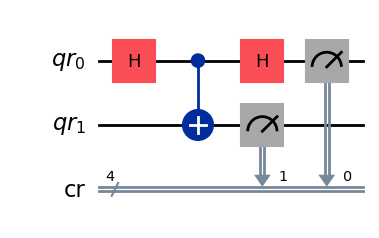

In [ ]:
circuits[0].draw(output = 'mpl')

## Record Results

In [ ]:
results = []
for i in range (numberOfSinglets):
  simulator = Aer.get_backend("qasm_simulator")
  backend = BasicProvider().get_backend('basic_simulator')
  transpiled_circuit = transpile(circuits[i], backend)

  result = backend.run(transpiled_circuit, shots = 1).result()
  results.append(result)

In [ ]:
abPatterns = [
    re.compile('..00$'), # search for the '..00' output (Alice obtained 0 and Bob obtained 0)
    re.compile('..01$'), # search for the '..01' output
    re.compile('..10$'), # search for the '..10' output (Alice obtained 0 and Bob obtained 1)
    re.compile('..11$')  # search for the '..11' output
]

In [ ]:
aliceResults = [] # Alice's results (string a)
bobResults = [] # Bob's results (string a')

for i in range(numberOfSinglets):

    #res = list(result.get_counts(circuits[i]).keys())[0] # extract the key from the dict and transform it to str; execution result of the i-th circuit
    res = str(list(results[i].get_counts().keys())[0])
    if abPatterns[0].search(res): # check if the key is '..00' (if the measurement results are -1,-1)
        aliceResults.append(0) # Alice got the result -1
        bobResults.append(0) # Bob got the result -1
    if abPatterns[1].search(res):
        aliceResults.append(1)
        bobResults.append(0)
    if abPatterns[2].search(res): # check if the key is '..10' (if the measurement results are -1,1)
        aliceResults.append(0) # Alice got the result -1
        bobResults.append(1) # Bob got the result 1
    if abPatterns[3].search(res):
        aliceResults.append(1)
        bobResults.append(1)


In [ ]:
print(aliceResults)

[1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 

In [ ]:
print(bobResults)

[1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 

## Revealing Base

In [ ]:
aliceKey = [] # Alice's key string k
bobKey = [] # Bob's key string k'

# comparing the stings with measurement choices
for i in range(numberOfSinglets):
    # if Alice and Bob have measured the spin projections onto the a_2/b_1 or a_3/b_2 directions
    if (aliceMeasurementChoices[i] == 2 and bobMeasurementChoices[i] == 1) or (aliceMeasurementChoices[i] == 3 and bobMeasurementChoices[i] == 2):
        aliceKey.append(aliceResults[i]) # record the i-th result obtained by Alice as the bit of the secret key k
        bobKey.append(bobResults[i])

keyLength = len(aliceKey) # length of the secret key
print("key length:", keyLength)

key length: 104


In [ ]:
abKeyMismatches = 0 # number of mismatching bits in Alice's and Bob's keys

for j in range(keyLength):
    if aliceKey[j] != bobKey[j]:
        abKeyMismatches += 1
print("Key Mismatch: ", abKeyMismatches)

Key Mismatch:  0


In [ ]:
print(aliceKey)

[0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0]


In [ ]:
print(bobKey)

[0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0]


# CHSH

In [ ]:
def chsh_corr(result):

    # lists with the counts of measurement results
    # each element represents the number of (0,0), (0,1), (1,0) and (1,1) results respectively
    countA1B1 = [0, 0, 0, 0] # XW observable
    countA1B3 = [0, 0, 0, 0] # XV observable
    countA3B1 = [0, 0, 0, 0] # ZW observable
    countA3B3 = [0, 0, 0, 0] # ZV observable

    for i in range(numberOfSinglets):

        res = list(results[i].get_counts().keys())[0]

        # if the spins of the qubits of the i-th singlet were projected onto the a_1/b_1 directions
        if (aliceMeasurementChoices[i] == 1 and bobMeasurementChoices[i] == 1):
            for j in range(4):
                if abPatterns[j].search(res):
                    countA1B1[j] += 1

        if (aliceMeasurementChoices[i] == 1 and bobMeasurementChoices[i] == 3):
            for j in range(4):
                if abPatterns[j].search(res):
                    countA1B3[j] += 1

        if (aliceMeasurementChoices[i] == 3 and bobMeasurementChoices[i] == 1):
            for j in range(4):
                if abPatterns[j].search(res):
                    countA3B1[j] += 1

        # if the spins of the qubits of the i-th singlet were projected onto the a_3/b_3 directions
        if (aliceMeasurementChoices[i] == 3 and bobMeasurementChoices[i] == 3):
            for j in range(4):
                if abPatterns[j].search(res):
                    countA3B3[j] += 1

    # number of the results obtained from the measurements in a particular basis
    total11 = sum(countA1B1)
    total13 = sum(countA1B3)
    total31 = sum(countA3B1)
    total33 = sum(countA3B3)

    # expectation values of XW, XV, ZW and ZV observables (2)
    expect11 = (countA1B1[0] - countA1B1[1] - countA1B1[2] + countA1B1[3])/total11 # 1/sqrt(2)
    expect13 = (countA1B3[0] - countA1B3[1] - countA1B3[2] + countA1B3[3])/total13 # -1/sqrt(2)
    expect31 = (countA3B1[0] - countA3B1[1] - countA3B1[2] + countA3B1[3])/total31 # 1/sqrt(2)
    expect33 = (countA3B3[0] - countA3B3[1] - countA3B3[2] + countA3B3[3])/total33 # 1/sqrt(2)

    # expect11 = (-countA1B1[0] + countA1B1[1] + countA1B1[2] - countA1B1[3])/total11 # 1/sqrt(2)
    # expect13 = (-countA1B3[0] + countA1B3[1] + countA1B3[2] - countA1B3[3])/total13 # -1/sqrt(2)
    # expect31 = (-countA3B1[0] + countA3B1[1] + countA3B1[2] - countA3B1[3])/total31 # 1/sqrt(2)
    # expect33 = (-countA3B3[0] + countA3B3[1] + countA3B3[2] -countA3B3[3])/total33 # 1/sqrt(2)

    corr = expect11 - expect13 + expect31 + expect33 # calculate the CHSH correlation value (3)
    print(f'expectxw = {expect11},expectxv = {expect13},expectzw = {expect31},,expectzv = {expect33}')
    print(countA1B1)
    print(countA1B3)
    print(countA3B1)
    print(countA3B3)

    return corr

In [ ]:
corr = chsh_corr(results) # CHSH correlation value

# CHSH inequality test
print('CHSH correlation value: ' + str(round(corr, 3)))

# Keys
print('Length of the key: ' + str(keyLength))
print('Number of mismatching bits: ' + str(abKeyMismatches) + '\n')

expectxw = 0.7931034482758621,expectxv = -0.7358490566037735,expectzw = 0.5625,,expectzv = 0.5
[25, 3, 3, 27]
[4, 17, 29, 3]
[27, 7, 7, 23]
[17, 6, 8, 25]
CHSH correlation value: 2.591
Length of the key: 104
Number of mismatching bits: 0



In [ ]:
A=[0,1]; S =[];
for a1 in A:
  for a2 in A:
    for b1 in A:
      for b2 in A:
        s = a1 * (b1 +b2) + a2 * (b1 - b2)
        S.append(s)